# Simple linear regression 

## 1. Relevant dependencies


In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
import statsmodels.api as sm
from matplotlib import pyplot as plt

In [3]:
#Data presentation
#training dataset from seaborn
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 2. Data cleaning

In [5]:
#not chinstrap species, drop missing values
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

## 3. Exploratory data analysis

- 3.1 Check for any linear relationships among variables in the dataframe by creating scatterplots using `seaborn` method 'pairplot' to create a scatterplot matrix.

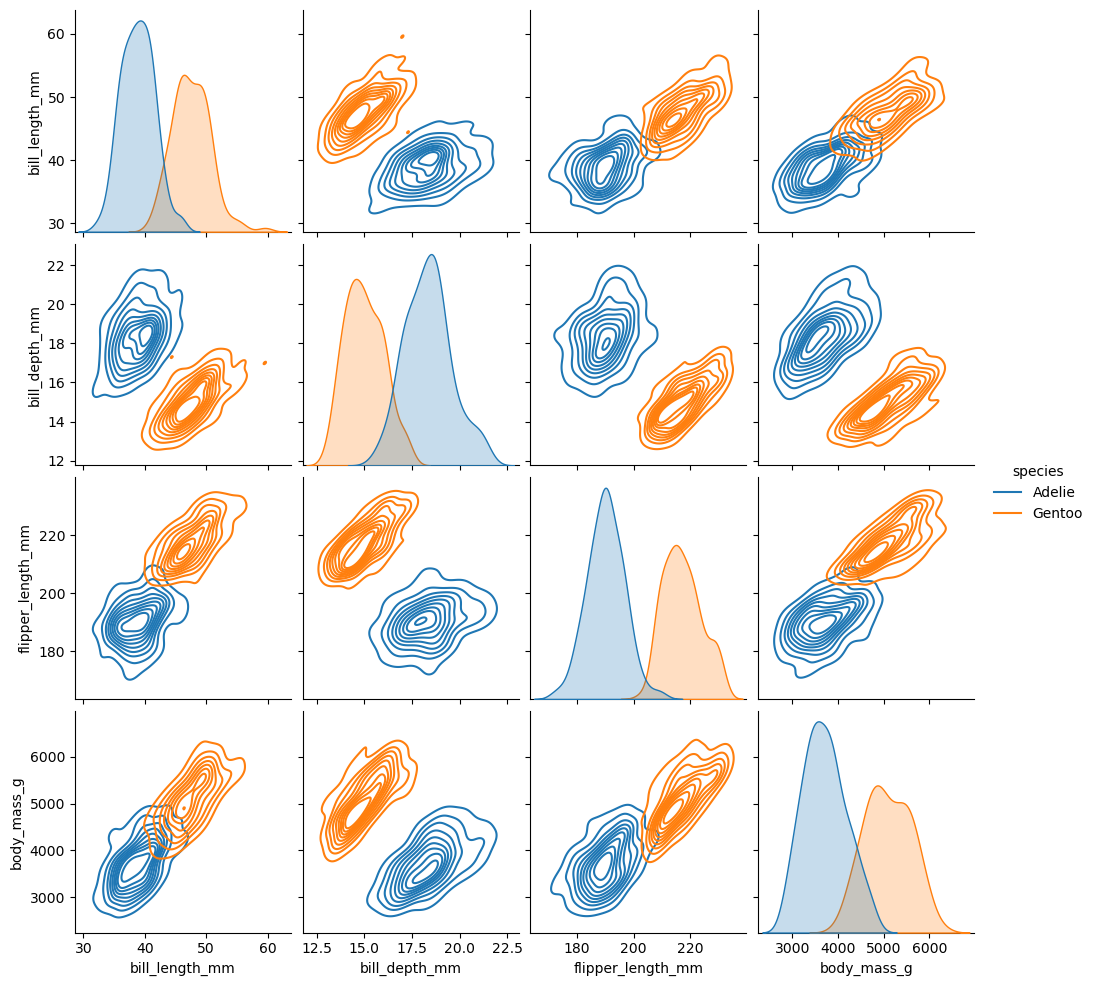

In [13]:
#scatterplot matrix to check linear relationships
sns.pairplot(penguins_final, hue='species',kind='kde',dropna=True)

## 4. Model construction



- 4.1 Based on the above scatterplots, **subset the variables of interest** from the dataframe.

In [27]:
# Subset Data of interest to the variable ols_data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

- 4.2 Construction of the linear regression formula, and save it as a string. The y or **dependent variable comes before** the `~`, and the x or independent variables comes after the `~`.

In [25]:
# save ols formula into the ols_formula variable
ols_formula = "body_mass_g ~ bill_length_mm"

- 4.3 Build OLS model with the `ols_formula` and `ols_data` and fit the model to the data.

In [34]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

- 4.4 Get **coefficients and more statistics** about the model.

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Tue, 25 Jun 2024   Prob (F-statistic):           1.33e-85
Time:                        22:38:17   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 4.5 **Visualize the regression line.**

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

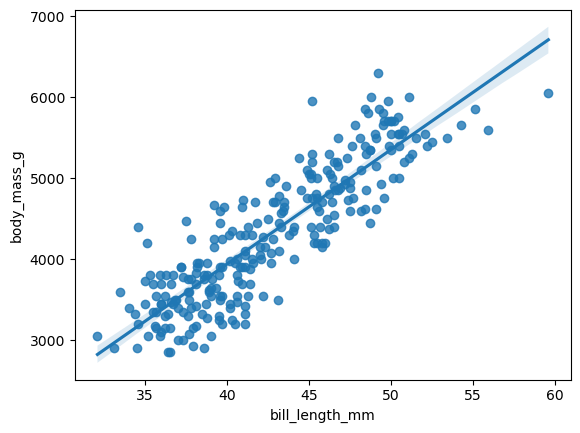

In [39]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

## 5. Finish checking model assumptions

- 5.1 There are four main model assumptions for simple linear regression, in no particular order:
    1. **Linearity:** Already checked by creating the scatterplot matrix and selecting the data of interest.✅
    2. **Normality:** The normality and homoscedasticity assumptions focus on the distribution of errors.
    3. **Independent observations:** The independent observations assumption is more about data collection. There is no reason to believe that one penguin's body mass or bill length would be related to any other penguin's anatomical measurements. ✅
    4. **Homoscedasticity:** The normality and homoscedasticity assumptions focus on the distribution of errors.

- 5.2 To check the remaining model assumptions, subset the X variable by isolating just the `bill_length_mm` column. Additionally, you can save the predicted values from the model using the `model.predict(X)` function.

In [59]:
# Subset X variable
X = ols_data["bill_length_mm"]

# Get predictions from model
fitted_values = model.predict(X)

- 5.3 Save the model residuals as a variable by using the `model.resid` attribute.

In [62]:
# Calculate residuals
residuals = model.resid

- ### 5.4 Check the normality assumption

- 5.4.1 Create a histogram of the residuals using the `histplot()` function from the `seaborn` package.

- **Normality is met if the histogram resembles a normal distribution**

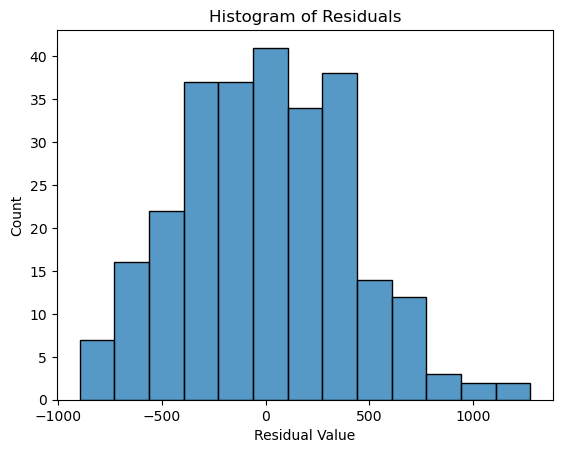

In [71]:
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

- 5.4.1 Another way to check the normality function is to create a quantile-quantile or Q-Q plot. If the residuals are normally distributed, you would expect a straight diagonal line going from the bottom left to the upper right of the Q-Q plot. Create a Q-Q plot by using the `qqplot` function from the `statsmodels.api` package.

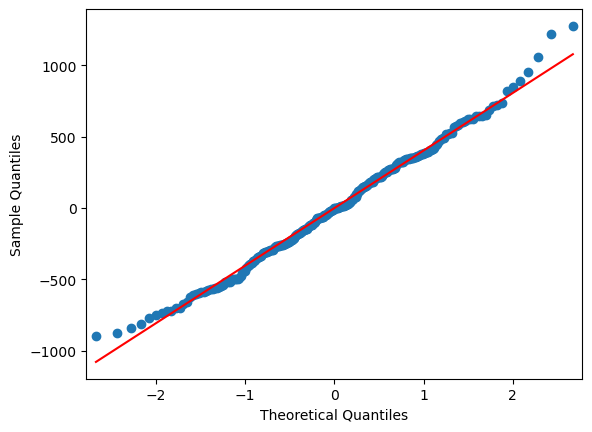

In [97]:
fig = sm.qqplot(model.resid, line = 's')
plt.show()

- ### 5.5 Check the homoscedasticity assumption

- 5.5 Lastly, create a scatterplot of the fitted values and residuals. If the plot resembles a random cloud (i.e., the residuals are scattered randomly), then the assumption is likely met.

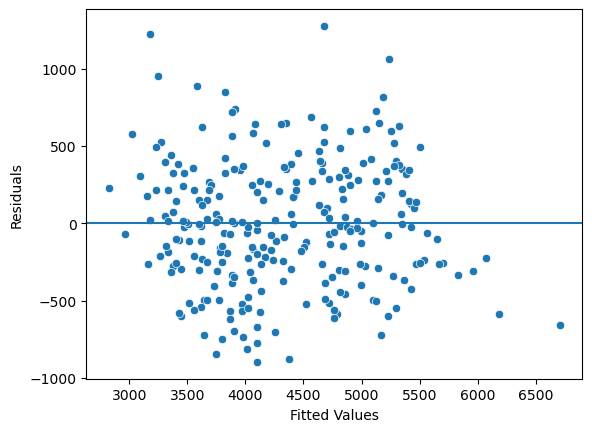

In [114]:
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()

## SIMPLE REGRESSION COMPLETED

**Model construction was build and assumptions were checked. Cheers**